# Week 1: Categorical and ordinal features (Video part 11)

Objective:
- What is the preprocessing should we use for these features?
- What is the differences between them?
- How can we generate new features from them?


### Categorical vs ordinal
- Example of categorical features in the Titanic dataset: Sex, Cabin, Embarked
- Example of ordinal features: Pclass (this is the ticket class = ordered categorical = ordinal)
  - If Pclass=1 is more expensive than Pclass=2, then we can also say that Pclass=3 is the least expensive out of Pclass=1 and 2.
  - If Pclass would have been a numeric feature, we could say that the difference between first and the second class is equal to the difference between second and third class.
  - But because Pcalass is ordinal feature, we don't know which differences is bigger.
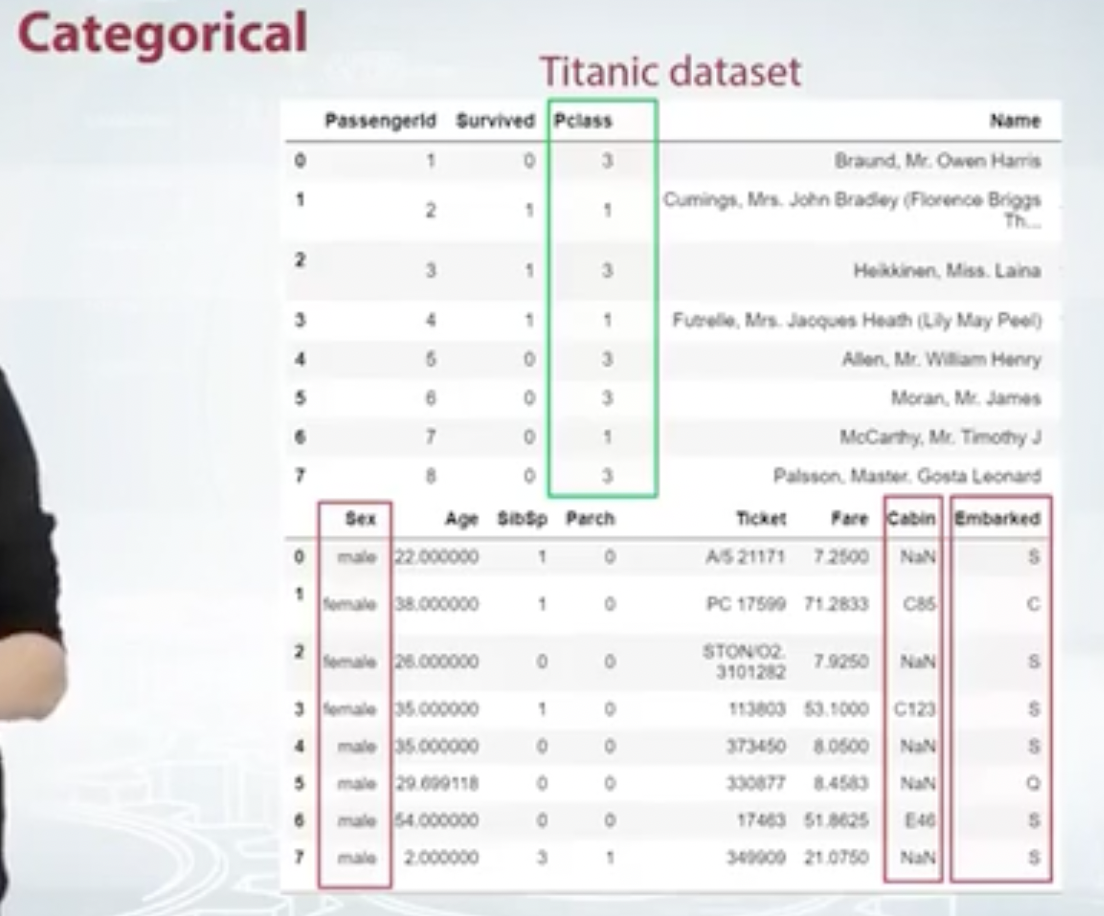
- Another example of ordinal features are: driver's license, education level etc
  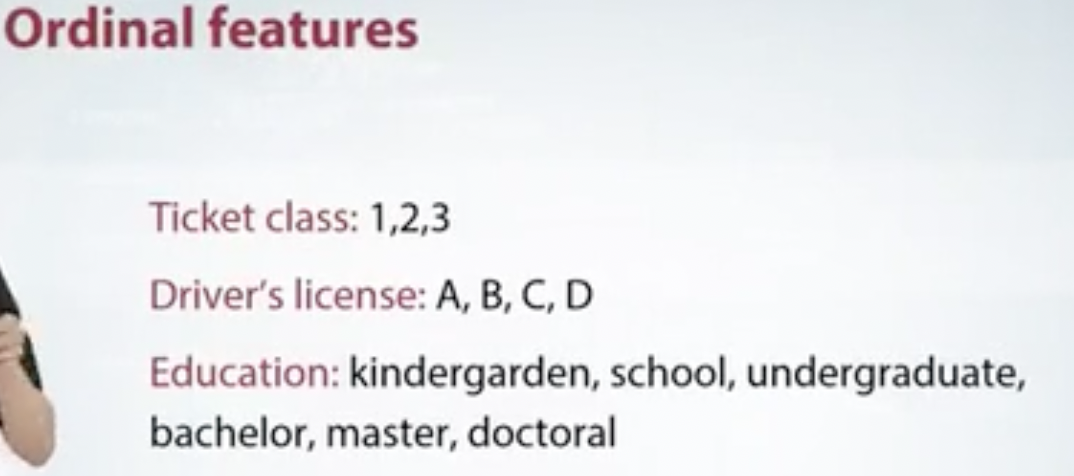

#### Categorical Encoding
- The simplest way to encode a categorical feature is to map its unique values to different numbers. This is called label encoding.
- This method works fine with trees, because tree-based models can split features and extract most of the useful values in categories on its own.
- Non-tree-based models, on the other hand, can't use this (encoded) feature effectively, so if we want to train linear model, kNN and neural network, we have to treat categorical fetures differently.

##### Label encoding
- Example 1: What if Pclass of one usually leads to the target of one,
 Pclass of two leads to zero, and Pclass of three leads to one. This dependence is not linear, and linear model will be confused. Linear model prediction would predict all cases above to around 0.5. Tree-based model on the other side, will just make 2 splits and treating it independently. Thus decision trees, could achieve much better scores here using this feature.
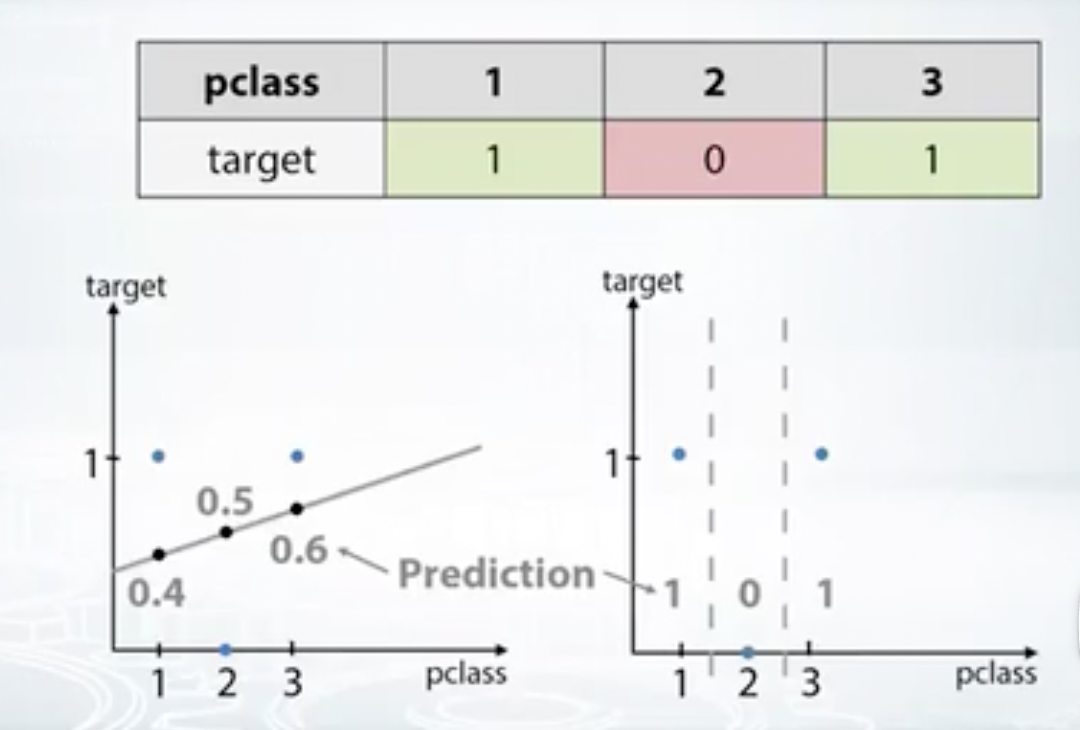
- Example 2:
  - We can apply label encoding using 2 methods for Embarked feature: alphabetical sorted order (which is how the label encoder in sklearn works by default) or order of appearance.
  - We could also apply frequency encoding: mapping value to their frequency. This will preserve some information about the values distribution and could help both linear and tree-based model.
    - Linear model will find this useful if the value frequency is correlated to the target value.
    - Can help tree-based model to split less because of the same reason.
    - Disadvantage: if you have multiple categories with the same number of frequency, they wont be distinguishable. To help resolve ties, we can apply rank to the frequencies. We can use `scipy.stats import rankdata`

 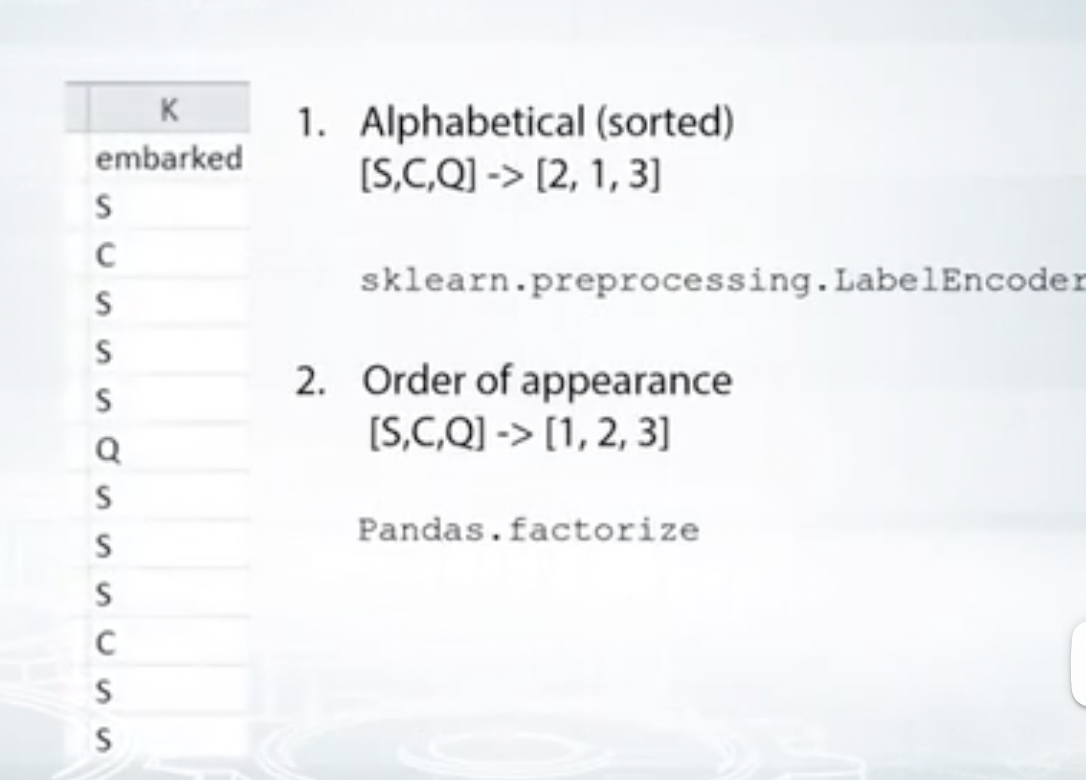
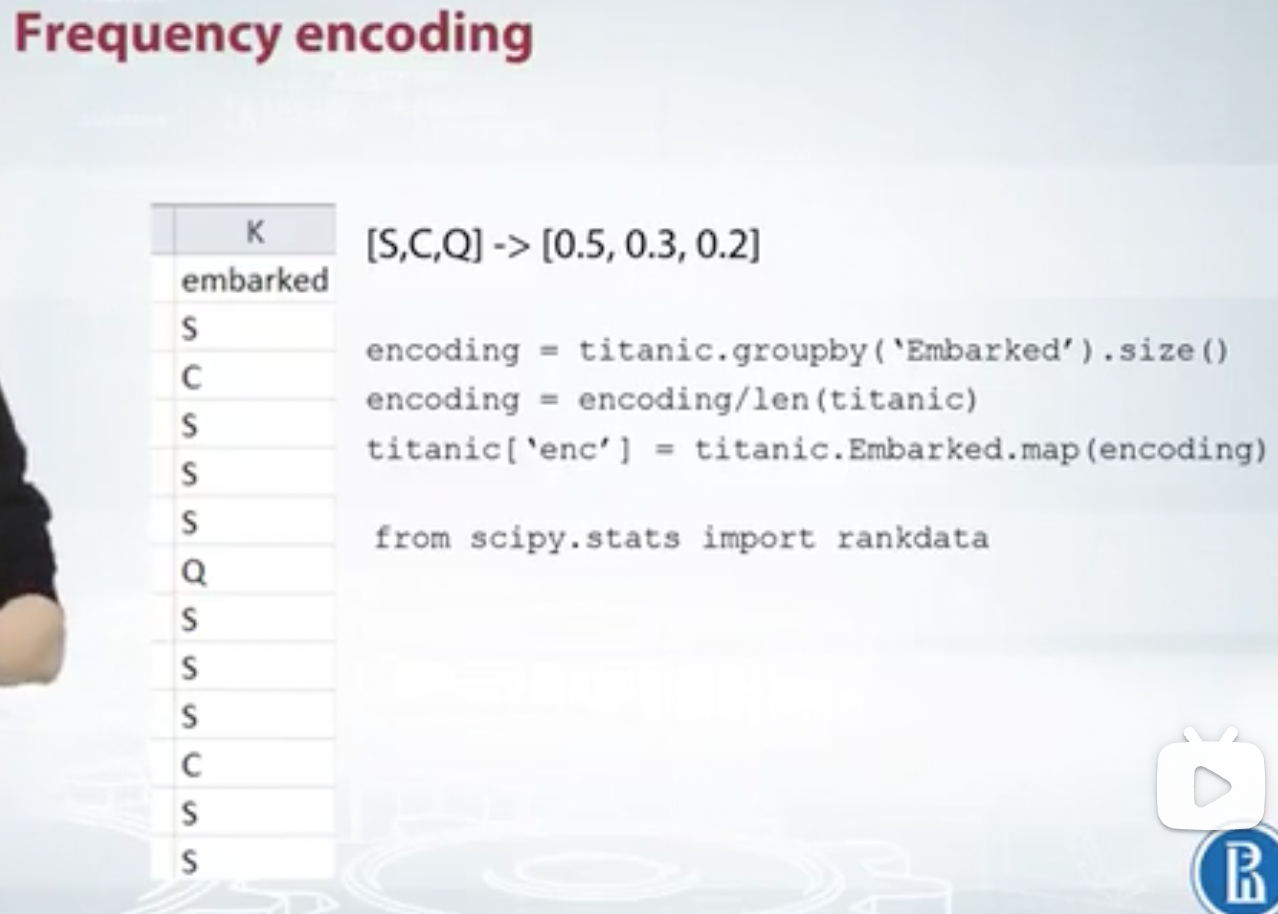

##### one-hot encoding
- Linear model (knn, neural networks) can struggle with label encoded feature. As workaround we can use one-hot encoding.
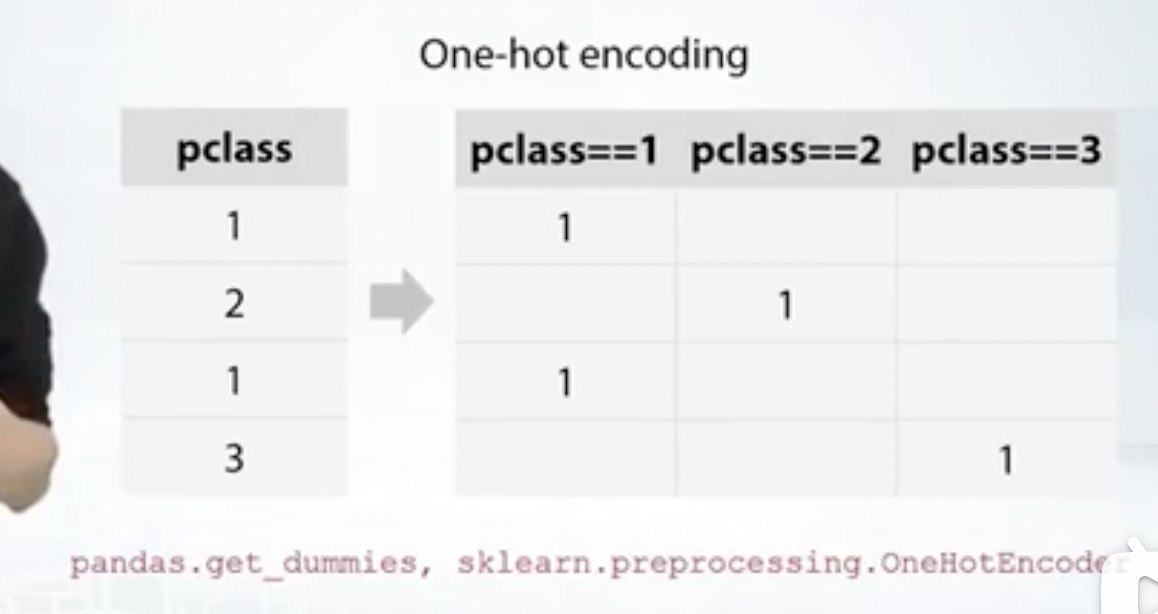
- One-hot encoding feature is already scaled, because min=0, max=1.
- Disadvantage:
  - if you have only a few important numeric features and hundreds of one-hot encoded features. Tree-based models would slow down and won't necessary improve results.
  - Applying one-hot encoding to feature with many unique values would create a lot of new columns only a few of non-zero values. To store these new array efficiently, we must know about sparse matrices. In a nutshell, instead of allocating space in RAM for every element of an array, we can store only non-zero elements and thus, save a lot of memory.
    - Going with sparse matrices makes sense if number of non-zero values is far less than half of all the values. Sparse matrices are often useful when they work with categorical features or text data. Most of the popular libraries can work with these sparse matrices directly namely, XGBoost, LightGBM, sklearn, and others.

#### Categorical Features Generation
- One of most useful examples of feature generation is feature interaction between several categorical features. This is usually useful for non tree based models namely, linear model, kNN.
- Example 1: let's hypothesize that target depends on both Pclass feature, and sex feature. If this is true, linear model could adjust its predictions for every possible combination of these two features, and get a better result. We can create this feature by simply concatenating strings from both columns and one-hot encoding them. Now linear model can find optimal coefficient for every interaction and improve.

  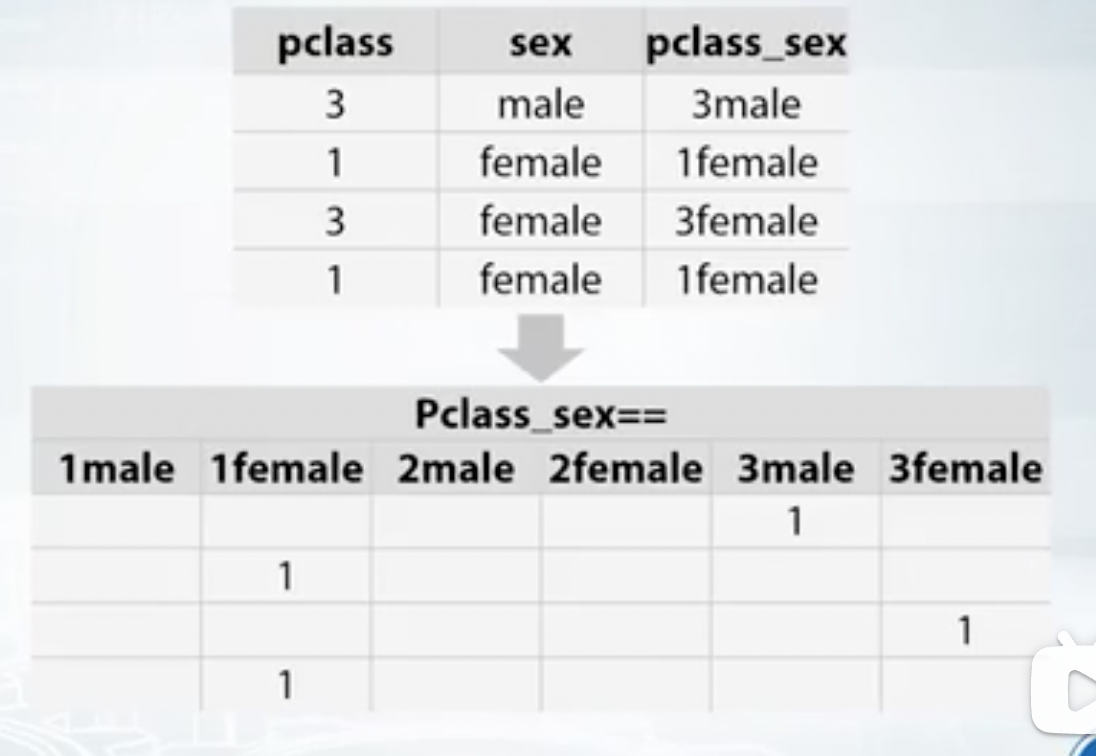

### conclusion

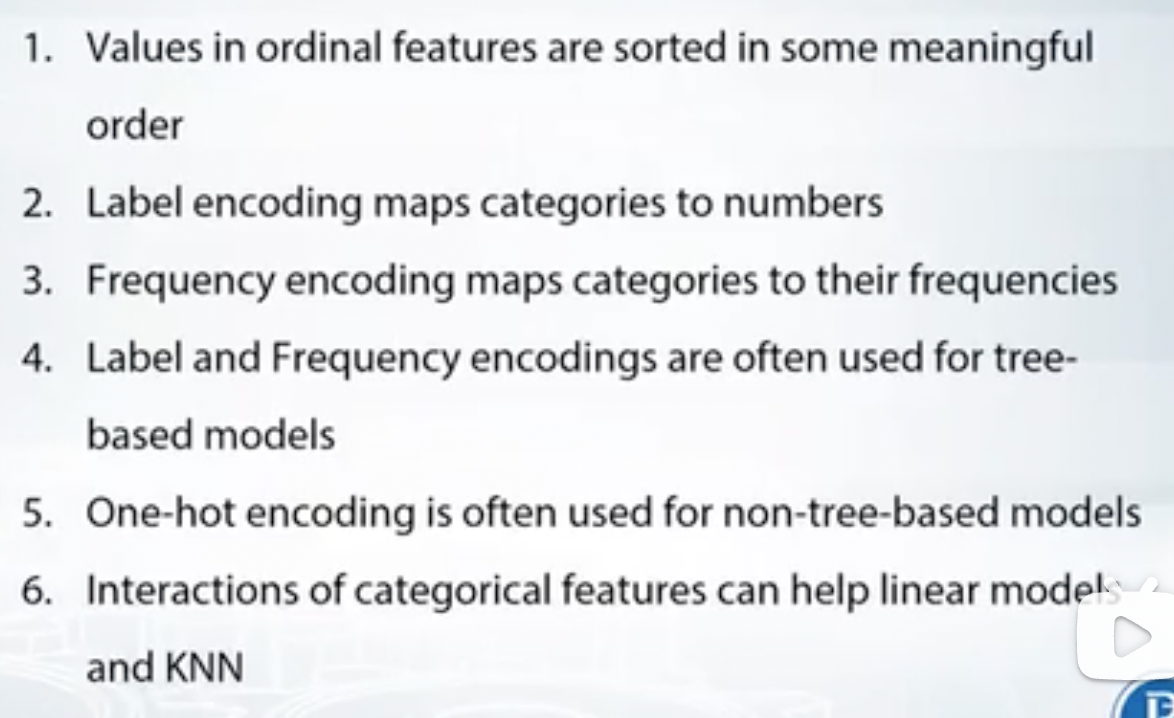

### What I learnt:
- Preprocessing/feature generation technique for non-tree based model (linear, kNN, neural networks)
  - frequency encoding + break ties using scipy.stats.rankdata
  - one-hot encoding for categorical features with not too much unique values (use sparse matrices to save memory)
  - capture feature interaction by concatenating categorical features and apply one-hot encoding
 
- Preprocessing/feature generation technique for tree-based model
  - frequency encoding + break ties using scipy.stats.rankdata
  - label encoding (sklearn LabelEncoder, Pandas factorize)